#Convolutions

In this notebook, we will delve into the concept of convolution to make it more approachable for anyone who might find it intimidating. Convolution means performing a simple elementwise multiplication of two matrices followed by a sum. Let's begin and see how convolution work. Now, without further ado, let us start our journey and witness the marvels of convolution in action!



#Python getting started

Firstly, to get access to images we need to Mount the Google Drive to Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive




###Downloading libraries

I have downloaded all the libraries and dependencies required for the project in one particular cell.



In [ ]:
# Importing necessary libraries
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity

###Convolutions

As I mentioned earlier, convolution is just a straightforward process of multiplying two matrices element by element and then adding up the results. It's a simple and powerful technique with a wide range of practical uses.



In [ ]:


def convolve(image, kernel):
    """
    Applies 2D convolution on the input image using the specified kernel.

    Parameters:
        image (numpy array): The input image to be convolved.
        kernel (numpy array): The 2D convolution kernel.

    Returns:
        numpy array: The output convolved image.
    """

    # Get the spatial dimensions of the image and the kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    # Calculate the padding size to ensure output size matches the input size
    pad = (kW - 1) // 2

    # Pad the borders of the input image to avoid border effects during convolution
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)

    # Initialize the output image with zeros
    output = np.zeros((iH, iW), dtype="float32")

    # Loop over each (x, y)-coordinate in the input image
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # Extract the region of interest (ROI) from the image centered at (x, y)
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            # Perform convolution by element-wise multiplication of ROI and kernel, then sum the result
            k = (roi * kernel).sum()

            # Store the convolved value in the output (x, y)-coordinate of the output image
            output[y - pad, x - pad] = k

    # Rescale the output image to the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")

    # Return the output image
    return output


In [ ]:
# Construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

# Construct a sharpening filter
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

# Construct the Laplacian kernel used to detect edge-like regions of an image
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

# Construct the Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

# Construct the Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

# Custom kernels
emboss = np.array((
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]), dtype="int")

identity = np.array((
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]), dtype="int")

prewittX = np.array((
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]), dtype="int")

prewittY = np.array((
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]), dtype="int")

boxBlur = np.ones((5, 5), dtype="float") * (1.0 / (5 * 5))

customEdge = np.array((
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]), dtype="int")

# Construct the Gaussian blur kernel (example with 5x5 kernel)
gaussianBlur = np.array((
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]), dtype="float") / 256

# Construct the kernel bank, a list of kernels we're going
# to apply using both our custom `convolve` function and
# OpenCV's `filter2D` function

kernelBank = (
    ("small_blur", smallBlur),      # Average blur kernel of size 7x7
    ("large_blur", largeBlur),      # Average blur kernel of size 21x21
    ("sharpen", sharpen),           # Sharpening kernel
    ("laplacian", laplacian),       # Laplacian edge detection kernel
    ("sobel_x", sobelX),            # Sobel edge detection kernel for x-axis
    ("sobel_y", sobelY),            # Sobel edge detection kernel for y-axis
    ("emboss", emboss),             # Emboss kernel for 3D effect
    ("identity", identity),         # Identity kernel, does not change the image
    ("prewitt_x", prewittX),        # Prewitt edge detection kernel for x-axis
    ("prewitt_y", prewittY),        # Prewitt edge detection kernel for y-axis
    ("box_blur", boxBlur),          # Box blur kernel for simple blurring
    ("custom_edge", customEdge),    # Custom edge detection kernel
    ("gaussian_blur", gaussianBlur) # Gaussian blur kernel
)


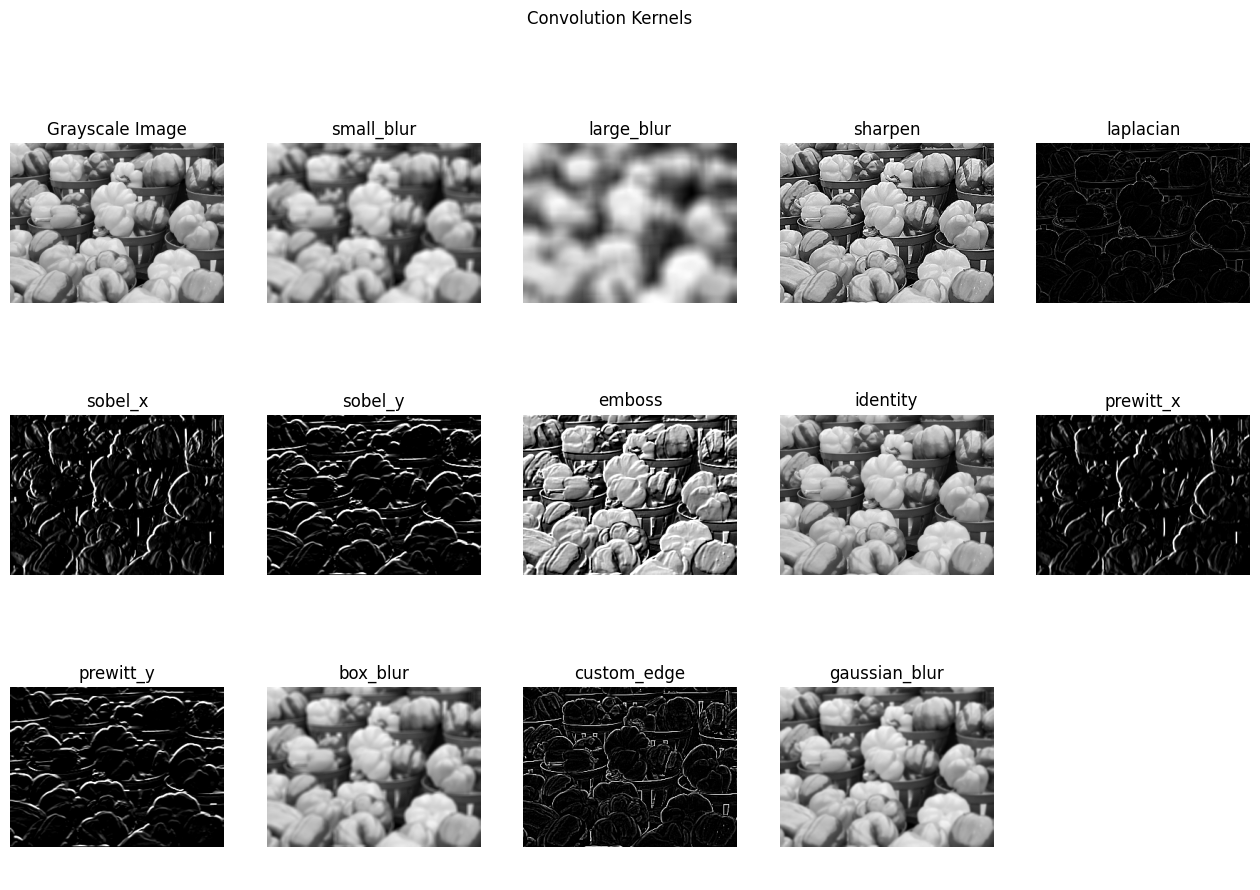

In [ ]:
# Load and resize the input image
image = cv2.imread("/content/peppers.jpg")
image = imutils.resize(image, width=300)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a figure to display all the kernels and their names
fig, axs = plt.subplots(3, 5, figsize=(16, 10))
fig.suptitle("Convolution Kernels")

# Plot the grayscale image in the first subplot
axs[0, 0].imshow(gray, cmap="gray")
axs[0, 0].set_title("Grayscale Image")
axs[0, 0].axis("off")

# Loop over the first 13 kernels and plot the results
for idx, (kernelName, kernel) in enumerate(kernelBank[:14]):
    # Convolve the grayscale image with the current kernel using filter2D
    convoleOutput = cv2.filter2D(gray, -1, kernel)

    # Plot the kernel output and add the kernel name as title
    ax = axs[(idx + 1) // 5, (idx + 1) % 5]
    ax.imshow(convoleOutput, cmap="gray")
    ax.set_title(kernelName)
    ax.axis("off")

# Hide the last subplot (empty photo)
axs[2, 3].axis("off")
axs[2, 4].axis("off")

plt.show()

#References
*   [Kernel (image processing)](https://en.wikipedia.org/wiki/Kernel_(image_processing)

*   [Convolutions with OpenCV and Python](https://pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/?_ga=2.19162940.526114981.1690758561-1664772421.1674074395)
*   [Image Kernels](https://setosa.io/ev/image-kernels/)

